In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas.plotting import register_matplotlib_converters
import nest_asyncio
from backtester import Backtester
from strategy import MAStrategy, HigherHighLowerLow, MomentumRSI, BasicMeanReversion
from historical_data_processor import DeribitDataProcessor as Deribit

nest_asyncio.apply() # added this cuz the original class uses asyncio; jupyter kernel has built in asyncio in place already



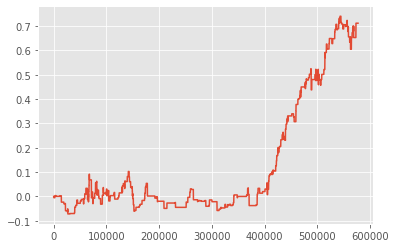

In [2]:

filename = 'new_data.csv'
ma = BasicMeanReversion(holding_period=300, up_multiplier=1.02, down_multiplier=0.98, up_trend_signal=1.03, down_trend_signal=0.97, long_lookback_period=60*24*5, short_lookback_period=60*12, csv_path=filename)

ma.run_backtester()

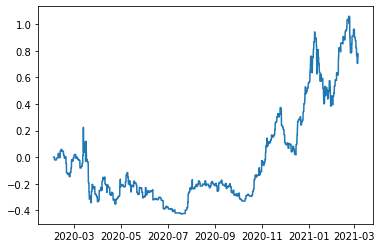

            volume     open      low     high    close           timestamp  \
198     332.937145   9315.5   9304.0   9393.5   9350.5 2020-02-03 06:00:00   
199    1585.014846   9351.0   9338.5   9372.5   9351.0 2020-02-03 07:00:00   
200    2966.650658   9350.0   9310.5   9355.0   9329.5 2020-02-03 08:00:00   
201   28778.357423   9329.5   9265.0   9495.5   9356.5 2020-02-03 09:00:00   
202    1796.258996   9355.5   9294.0   9357.5   9294.0 2020-02-03 10:00:00   
...            ...      ...      ...      ...      ...                 ...   
9715    147.851402  48800.0  48717.0  49749.5  48847.5 2021-03-05 19:00:00   
9716     47.233611  48834.0  48579.0  48916.5  48669.0 2021-03-05 20:00:00   
9717    174.387845  48676.5  48065.0  48754.0  48747.0 2021-03-05 21:00:00   
9718    382.894582  48746.5  47917.0  49491.5  48643.0 2021-03-05 22:00:00   
9719     78.258944  48691.0  48148.0  48691.0  48477.0 2021-03-05 23:00:00   

      next_open        RSI       ma_long      ma_short  long  s

In [4]:
ma = MomentumRSI(Deribit, '2020', '01', '26', holding_period=24, up_multiplier=1.05,
                    down_multiplier=0.95, RSI_lookback_period = 14)
ma.run_backtester()
print(ma.df)